## Linear Relationship Assumption 

- Linear regression assumes that there is a linear relationship between X and Y

- Y ≈ α0 + α1X1 + α2X2 + ... + αnXn. 


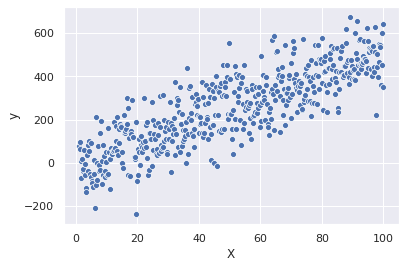

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
sns.set()
n = 500
x = np.linspace(1, 100, n)
y = x * 5 + np.random.randn(n)*100
data = pd.DataFrame({'X':x, 'y':y})
sns.scatterplot(x='X', y='y', data=data)

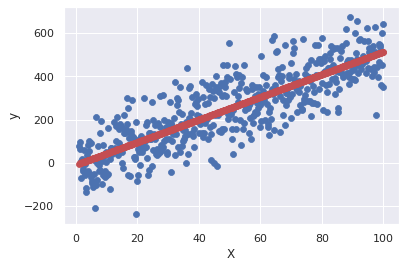

In [93]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(data[['X']], data['y'])
y_pred = model.predict(data[['X']])


fig, ax = plt.subplots()
sns.scatterplot(x='X', y='y', data=data, ax=ax,  edgecolor=None)
sns.scatterplot(x=data['X'], y=y_pred, ax=ax, color='r',  edgecolor=None)

### Logistic Regression [ Simple Classification ] 

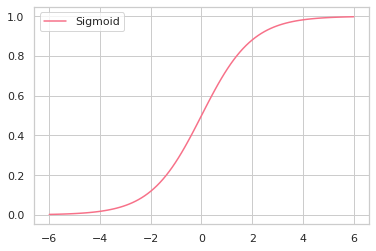

In [94]:
X = np.linspace(-6, 6, 100)
y = 1 / (1 + np.exp(-X))
sns.set_style("whitegrid")
with sns.color_palette('husl'):
  sns.lineplot(x=X, y=y)
plt.legend(labels=['Sigmoid'])

## Algorithms with Linear Assumptions

- Linear Regression
- Logistic Regression
- Linear Discriminant Analysis
- Principal Component Analysis

## Key Takeaways

- Linear models are easy to interpret and understand

- Linear models prove useful when data is linearly related 

- Non-linear models usually have trouble predicting outside the range of the training dataset 



In [0]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
from sklearn.datasets import load_boston
X, y = load_boston(return_X_y=True)

In [97]:
X[1,:]

array([2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
       6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
       1.7800e+01, 3.9690e+02, 9.1400e+00])

In [98]:
X.shape

(506, 13)

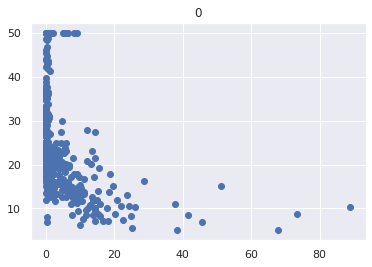

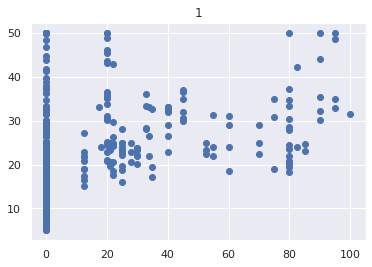

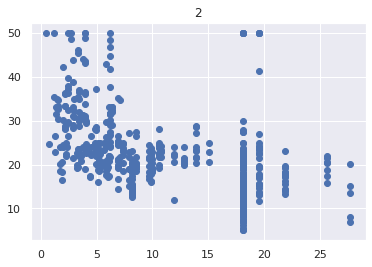

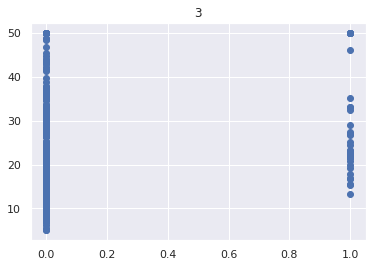

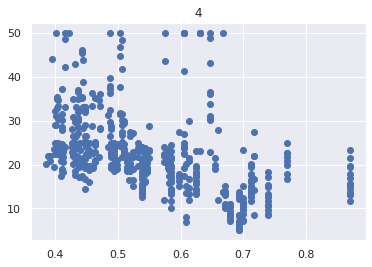

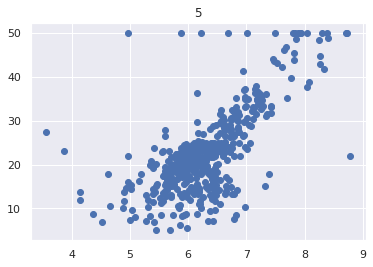

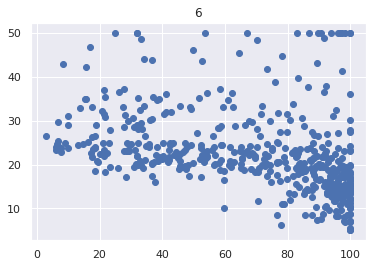

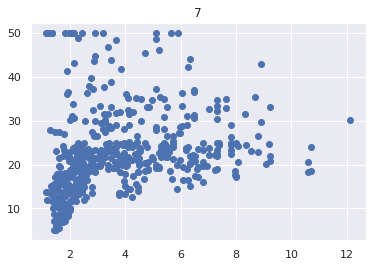

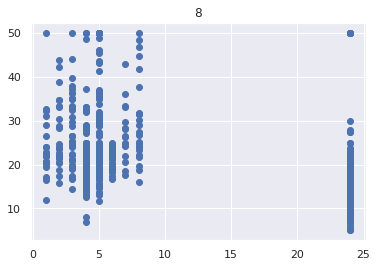

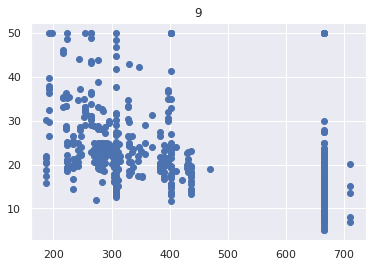

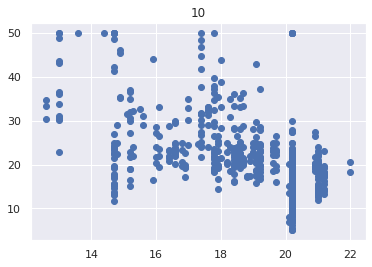

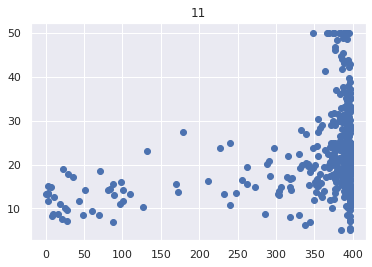

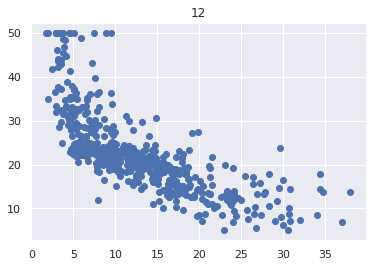

In [99]:
sns.set()
for i in range(X.shape[1]):
    plt.scatter(x=X[:,i], y=y)
    plt.title(i)
    plt.show()

In [0]:
L = [5,6,7,12]
NL = [10,9,4,0]

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

X_train.shape, X_test.shape

((404, 13), (102, 13))

In [102]:
from sklearn.linear_model import LinearRegression
for i in range(X.shape[1]):
  print(i)
  model = LinearRegression()
  model.fit(X_train[:,[i]], y_train)
  print('Train set')
  y_pred = model.predict(X_train[:,[i]])
  print('Linear Regression Train mse: {}'.format(mean_squared_error(y_train, y_pred)))
  print('Test set')
  y_pred = model.predict(X_test[:,[i]])
  print('Linear Regression Test mse: {}'.format(mean_squared_error(y_test, y_pred)))
  print()


0
Train set
Linear Regression Train mse: 75.34714954231598
Test set
Linear Regression Test mse: 57.55559970173503

1
Train set
Linear Regression Train mse: 73.47232771709488
Test set
Linear Regression Test mse: 73.97785175139974

2
Train set
Linear Regression Train mse: 67.69486553383007
Test set
Linear Regression Test mse: 53.12883934533407

3
Train set
Linear Regression Train mse: 83.95157840279994
Test set
Linear Regression Test mse: 73.69234174165514

4
Train set
Linear Regression Train mse: 70.32581349907107
Test set
Linear Regression Test mse: 64.44681429214448

5
Train set
Linear Regression Train mse: 46.662126478401056
Test set
Linear Regression Test mse: 31.734575499552

6
Train set
Linear Regression Train mse: 73.3446787580755
Test set
Linear Regression Test mse: 69.80023739514381

7
Train set
Linear Regression Train mse: 81.0787015406619
Test set
Linear Regression Test mse: 72.13280514443886

8
Train set
Linear Regression Train mse: 76.11955506840503
Test set
Linear Regressi

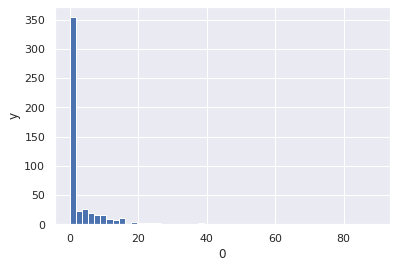

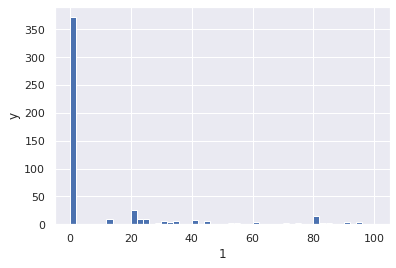

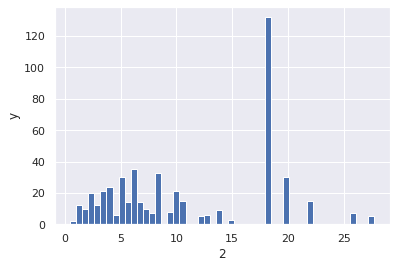

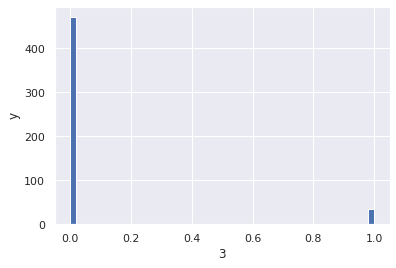

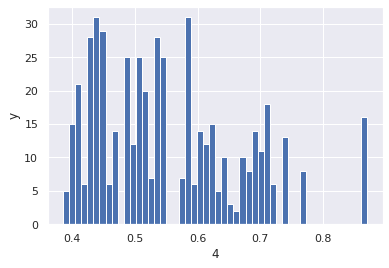

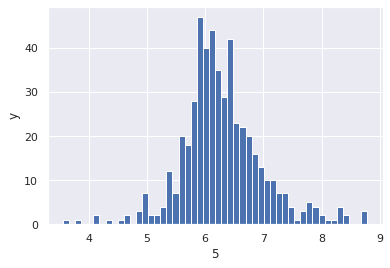

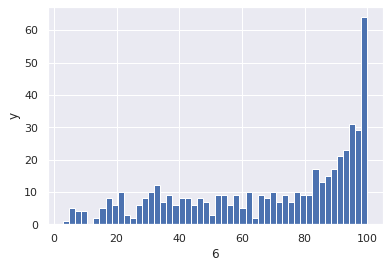

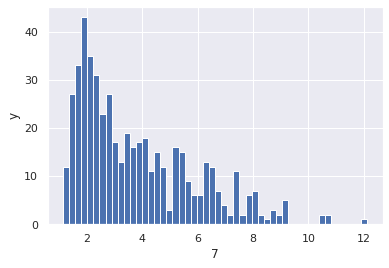

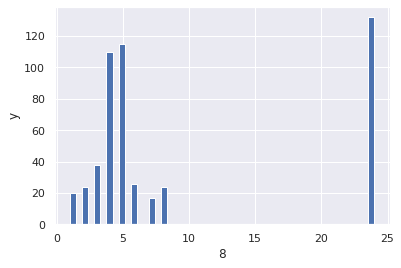

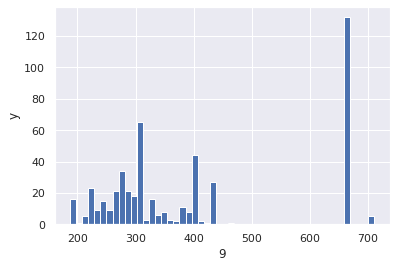

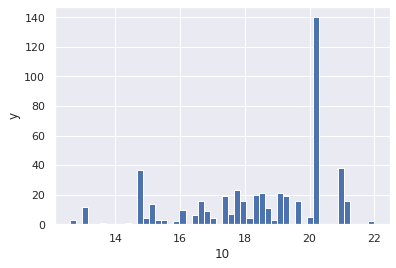

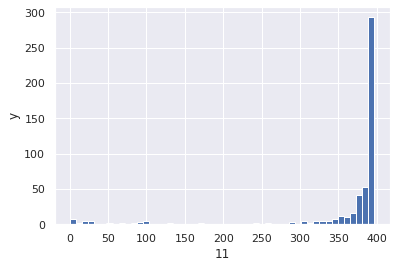

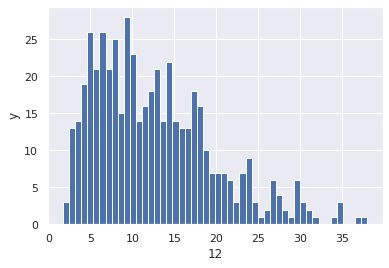

In [103]:
for i in range(X.shape[1]):
  fig, ax = plt.subplots()
  plt.hist(X[:,i],bins=50)
  ax.set_xlabel(i)
  ax.set_ylabel('y')
  plt.show()

In [0]:
# let's normalise 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train[:,L+NL])
X_test = scaler.transform(X_test[:,L+NL])

In [105]:
X_train.shape

(404, 8)

In [106]:
from sklearn.linear_model import LinearRegression
for i in range(X_train.shape[1]):
  print(i)
  model = LinearRegression()
  model.fit(X_train[:,[i]], y_train)
  print('Train set')
  y_pred = model.predict(X_train[:,[i]])
  print('Linear Regression Train mse: {}'.format(mean_squared_error(y_train, y_pred)))
  print('Test set')
  y_pred = model.predict(X_test[:,[i]])
  print('Linear Regression Test mse: {}'.format(mean_squared_error(y_test, y_pred)))
  print()


0
Train set
Linear Regression Train mse: 46.66212647840105
Test set
Linear Regression Test mse: 31.734575499552005

1
Train set
Linear Regression Train mse: 73.3446787580755
Test set
Linear Regression Test mse: 69.80023739514381

2
Train set
Linear Regression Train mse: 81.07870154066191
Test set
Linear Regression Test mse: 72.13280514443886

3
Train set
Linear Regression Train mse: 39.27832856017816
Test set
Linear Regression Test mse: 35.638184134975724

4
Train set
Linear Regression Train mse: 66.63142353973592
Test set
Linear Regression Test mse: 47.477605941703786

5
Train set
Linear Regression Train mse: 70.41064419792467
Test set
Linear Regression Test mse: 48.65342469223973

6
Train set
Linear Regression Train mse: 70.32581349907107
Test set
Linear Regression Test mse: 64.44681429214448

7
Train set
Linear Regression Train mse: 75.34714954231598
Test set
Linear Regression Test mse: 57.55559970173502



In [107]:
from sklearn.svm import SVR
for i in range(X_train.shape[1]):
  print(i)
  model = SVR()
  model.fit(X_train[:,[i]], y_train)
  print('Train set')
  y_pred = model.predict(X_train[:,[i]])
  print('SVR Train mse: {}'.format(mean_squared_error(y_train, y_pred)))
  print('Test set')
  y_pred = model.predict(X_test[:,[i]])
  print('SVR Test mse: {}'.format(mean_squared_error(y_test, y_pred)))
  print()

0
Train set
SVR Train mse: 39.76621209657459
Test set
SVR Test mse: 33.90667985189643

1
Train set
SVR Train mse: 78.20169086009302
Test set
SVR Test mse: 64.23439244802944

2
Train set
SVR Train mse: 83.07079736183988
Test set
SVR Test mse: 60.20422801537523

3
Train set
SVR Train mse: 33.02447135452237
Test set
SVR Test mse: 30.11820165755008

4
Train set
SVR Train mse: 67.22281321186533
Test set
SVR Test mse: 44.617532328856065

5
Train set
SVR Train mse: 74.94578543359135
Test set
SVR Test mse: 48.668235010551626

6
Train set
SVR Train mse: 74.83384329388987
Test set
SVR Test mse: 58.91684800316813

7
Train set
SVR Train mse: 76.65193239895343
Test set
SVR Test mse: 52.950475248565205



In [108]:
from sklearn.tree import DecisionTreeRegressor
for i in range(X_train.shape[1]):
  print(i)
  model = DecisionTreeRegressor()
  model.fit(X_train[:,[i]], y_train)
  print('Train set')
  y_pred = model.predict(X_train[:,[i]])
  print('DT Train mse: {}'.format(mean_squared_error(y_train, y_pred)))
  print('Test set')
  y_pred = model.predict(X_test[:,[i]])
  print('DT Test mse: {}'.format(mean_squared_error(y_test, y_pred)))
  print()

0
Train set
DT Train mse: 4.573824257425743
Test set
DT Test mse: 61.580367647058836

1
Train set
DT Train mse: 23.250115511551154
Test set
DT Test mse: 159.2778479030501

2
Train set
DT Train mse: 2.287508250825083
Test set
DT Test mse: 93.2295179738562

3
Train set
DT Train mse: 2.4604496699669967
Test set
DT Test mse: 56.86627450980394

4
Train set
DT Train mse: 52.66475704718212
Test set
DT Test mse: 36.605041172006196

5
Train set
DT Train mse: 51.18497638880188
Test set
DT Test mse: 43.025591830686636

6
Train set
DT Train mse: 23.49893768700359
Test set
DT Test mse: 33.134508135099246

7
Train set
DT Train mse: 0.15524752475247522
Test set
DT Test mse: 89.31029411764709

